In [19]:
# pip install ipython
# pip install pillow
import numpy as np
import pandas as pd
import graphviz
import matplotlib.pyplot as plt

from IPython.display import Image

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from PIL import Image #order matters

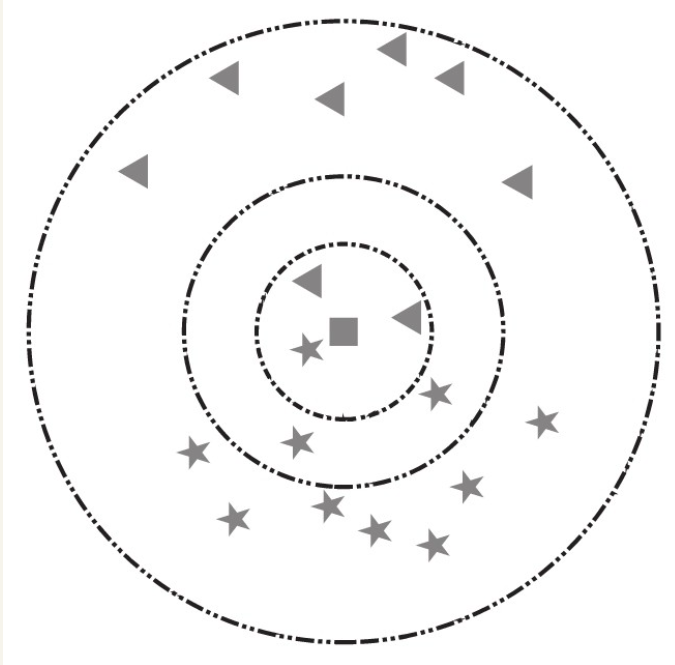

In [2]:
'''
What is kNN algorithm in one graph ?
'''

Image(filename = "knn.png", width = 300, height = 300)

In [3]:
wine_df = pd.read_excel('葡萄酒.xlsx')
wine_df

,原始样本,酒精含量(%),苹果酸含量(%),分类
0,样本1,5,2,0
1,样本2,6,1,0
2,样本3,4,1,0
3,样本4,8,3,1
4,样本5,10,2,1


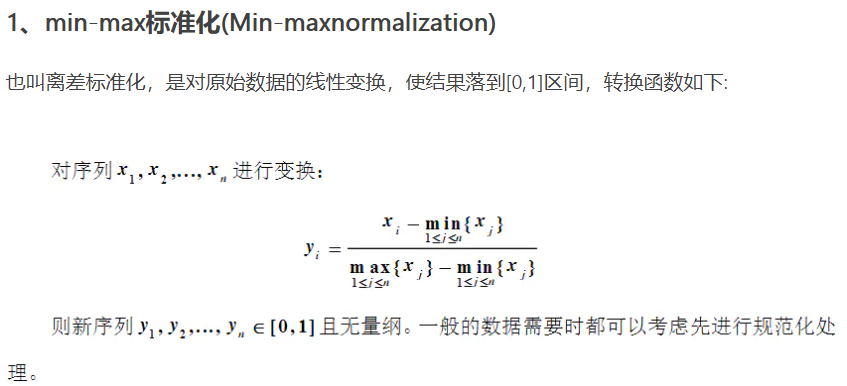

In [4]:
'''
添加数据预处理: 标准化(均值归一化)

为防止距离被某个特征主导,
要保证单个样本内每个特征的值相接近.

以 minmax standarization 为例.
'''

Image(filename = "minmax.png", width = 700, height = 700)

In [5]:
'''
Try kNN classification:
'''

# 特征变量和目标变量的切分
X_train = wine_df[['酒精含量(%)','苹果酸含量(%)']]
y_train = wine_df['分类']

X_minmax = MinMaxScaler().fit_transform(X_train) #minmax standarization
X_zscore = StandardScaler().fit_transform(X_train)#zscore standarization
print(X_minmax)
print(X_zscore)

wine_knn = KNN(n_neighbors=3)
wine_knn.fit(X_minmax, y_train)

X_test = [[7, 1], [6, 4]]  # X_test为测试集特征变量
answer = wine_knn.predict(X_test)  
print(answer)

[[0.16666667 0.5       ]
 [0.33333333 0.        ]
 [0.         0.        ]
 [0.66666667 1.        ]
 [1.         0.5       ]]
[[-0.74278135  0.26726124]
 [-0.27854301 -1.06904497]
 [-1.2070197  -1.06904497]
 [ 0.64993368  1.60356745]
 [ 1.57841037  0.26726124]]
[1 1]


In [6]:
'''
Try kNN regression:
'''

reg_model = KNeighborsRegressor(n_neighbors=2)
reg_model.fit(X_train, y_train)

print(reg_model.predict([[7, 1], [6, 4]]))

[0.  0.5]


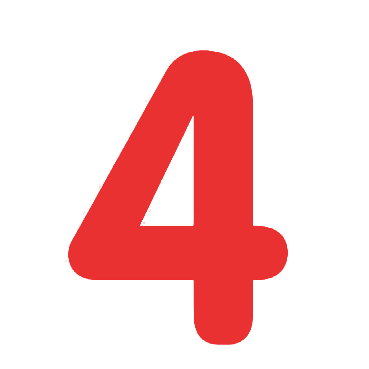

In [7]:
'''
image recognition
'''

Image(filename = "数字4.png", width = 300, height = 300)

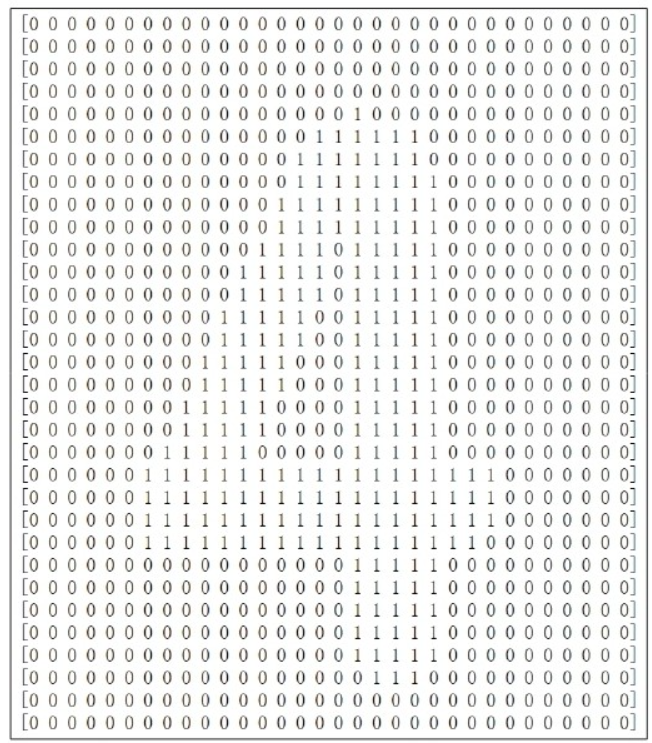

In [8]:
Image(filename = "数字4二维.png", width = 300, height = 300)

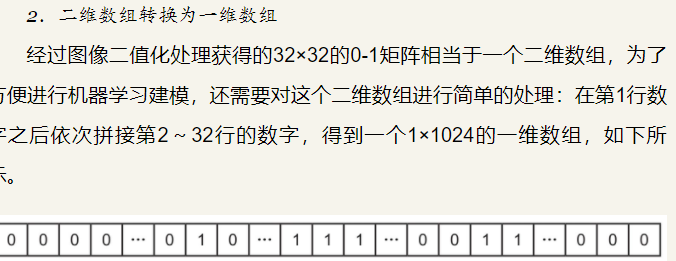

In [9]:
'''
将2D图转为1D图, 视为一个图向量,
图与图之间的联系用两个图向量之间的距离计算就可以
'''

Image(filename = "数字4一维.png", width = 500, height = 500)

In [10]:
'''
代码实现
'''

imgRecog_df = pd.read_excel('手写字体识别.xlsx')
imgRecog_df.head(10)

,对应数字,0,1,2,3,4,5,6,7,8,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# 提取features 和 label
X_img = imgRecog_df.drop(columns='对应数字')
y_img = imgRecog_df['对应数字']

# normalization
X_img_std = StandardScaler().fit_transform(X_img)

# do train_test_split
X_img_train, X_img_test, y_img_train, y_img_test\
= train_test_split(X_img_std, y_img, test_size=0.2, random_state=76)

# fit kNN model
img_knn = KNN(n_neighbors=5)
img_knn.fit(X_img_train, y_img_train)

# make prediction with fitted kNN model on 1D image dataset
y_img_pred = img_knn.predict(X_img_test)

# image prediction result in dataframe form
img_pred_df = pd.DataFrame()  # 创建一个空DataFrame
img_pred_df['预测值'] = list(y_img_pred)
img_pred_df['实际值'] = list(y_img_test)

img_pred_df.head()

,预测值,实际值
0,2,2
1,2,2
2,2,2
3,7,7
4,2,2


In [12]:
# 两种打分方法
recog_score = accuracy_score(y_img_pred, y_img_test)
recog_score2 = img_knn.score(X_img_test, y_img_test)

print(recog_score, recog_score2)

0.9405684754521964 0.9405684754521964


In [13]:
'''
用Grid Search进行单个超参数调优.
'''

hy_parameters = {'n_neighbors': np.arange(1,10,2)} 
#loop hyper parameter n_neighbors 1,3,5,7,9

ori_model = KNN()
grid_search = GridSearchCV(ori_model, hy_parameters, cv=5) # 5_fold validation
#不设置scoring则默认以accuracy作为衡量标准

grid_search.fit(X_img_train, y_img_train)  # 传入测试集数据并开始进行参数调优
print(grid_search.best_params_['n_neighbors'] ) # 输出参数的最优值

1


In [16]:
'''
输出较优模型(单参优化)
'''

better_model = KNN(n_neighbors=1)  #用n_neighbors=1重新搭建模型
better_model.fit(X_img_train, y_img_train)

# make prediction with fitted kNN model on 1D image dataset
better_y_pred = better_model.predict(X_img_test)

# better accuracy score
better_recog_score = accuracy_score(better_y_pred, y_img_test)

print(better_recog_score)

0.9483204134366925


In [23]:
'''
前面直接拿了1D图向量来进行预测,
但如何用代码将图像变为2D[1,0]矩阵,再到1D图向量呢?
'''

img_input = Image.open('数字4.png') # use Image from PTL package
img_input = img_input.resize((32,32)) # adjust size of image
#img_input.show() #show original image

img_grey = img_input.convert('L') # convert colorful image to grey image

# 将灰白图转为2D矩阵, 这里lambda x为点的色彩值: (黑0 ~白255)
img_2d = img_grey.point(lambda x: 0 if x > 128 else 1)
img_2d_arr = np.array(img_2d)
print(img_2d_arr.shape)
for i in range(img_2d_arr.shape[0]):
    print(img_2d_arr[i])

(32, 32)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
[

In [24]:
# convert 2D image array into 1D array (行: reshape(1,-1); 列: reshape(-1,1))
img_1d_arr = img_2d_arr.reshape(1,-1)
print(img_1d_arr)

[[0 0 0 ... 0 0 0]]
